In [1]:
import pandas as pd
import numpy as np

In [2]:
spotify = pd.read_excel('spotify-2023 (cleaned).xlsx')

In [3]:
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

In [5]:
spotify.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [7]:
missing_value_count = spotify.isnull().sum()
print(missing_value_count)

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [8]:
spotify = spotify.dropna(subset=['key'])

In [9]:
spotify.dropna(inplace=True)

In [10]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            817 non-null    object 
 1   artist(s)_name        817 non-null    object 
 2   artist_count          817 non-null    int64  
 3   released_year         817 non-null    int64  
 4   released_month        817 non-null    int64  
 5   released_day          817 non-null    int64  
 6   in_spotify_playlists  817 non-null    int64  
 7   in_spotify_charts     817 non-null    int64  
 8   streams               817 non-null    object 
 9   in_apple_playlists    817 non-null    int64  
 10  in_apple_charts       817 non-null    int64  
 11  in_deezer_playlists   817 non-null    int64  
 12  in_deezer_charts      817 non-null    int64  
 13  in_shazam_charts      817 non-null    float64
 14  bpm                   817 non-null    int64  
 15  key                   817 no

In [11]:
spotify['streams'] = pd.to_numeric(spotify['streams'], errors='coerce')

In [12]:
re_col = {
    'track_name': 'track',
    'artist(s)_name': 'artist(s)',
    'artist_count': 'artist_count',
    'released_year': 'year',
    'released_month': 'month',
    'released_day': 'day',
    'in_spotify_playlists': 'in_spotify_playlists',
    'in_spotify_charts': 'in_spotify_charts',
    'streams': 'streams',
    'in_apple_playlists': 'in_apple_playlists',
    'in_apple_charts': 'in_apple_charts',
    'in_deezer_playlists': 'in_deezer_playlists',
    'in_deezer_charts': 'in_deezer_charts',
    'in_shazam_charts': 'in_shazam_charts',
    'bpm': 'bpm',
    'key': 'key',
    'mode': 'mode',
    'danceability_%': 'danceability',
    'valence_%': 'valence',
    'energy_%': 'energy',
    'acousticness_%': 'acousticness',
    'instrumentalness_%': 'instrumentalness',
    'liveness_%': 'liveness',
    'speechiness_%': 'speechiness'
}

spotify.rename(columns=re_col, inplace=True)
spotify

,track,artist(s),artist_count,year,month,day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,97,C#,Major,82,67,77,8,0,12,5


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='mode', ylabel='count'>

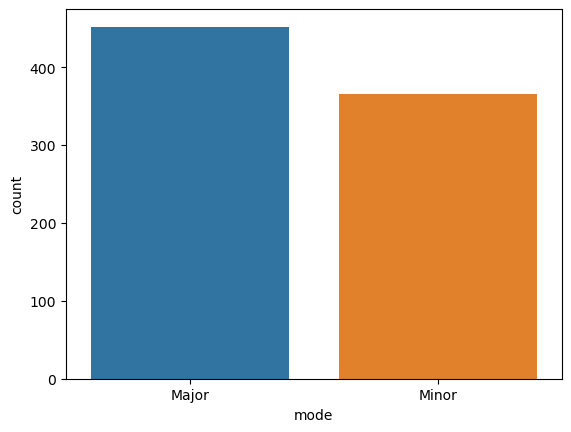

In [17]:
sns.countplot(x='mode',data=spotify)

<Axes: xlabel='key', ylabel='count'>

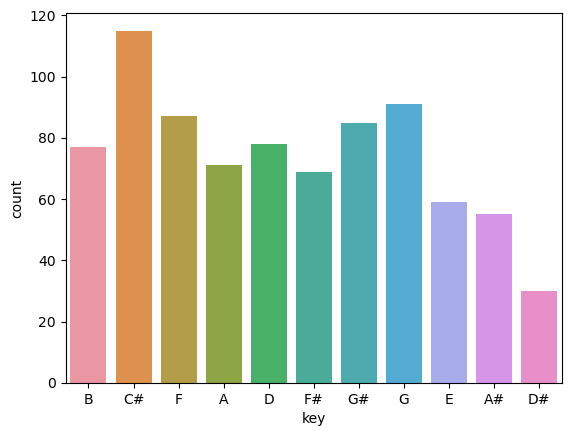

In [20]:
sns.countplot(x='key',data=spotify)

In [22]:
top50 = spotify.nlargest(50, 'streams')[['track','artist(s)','streams']]

In [23]:
top50['streams'] = top50['streams'] / 1000000000

In [32]:
plt.figure(figsize=(100,100))
sns.barplot(data = top50, x = "artist(s)", y = "streams")

<Axes: xlabel='artist(s)', ylabel='streams'>

<Axes: xlabel='year', ylabel='count'>

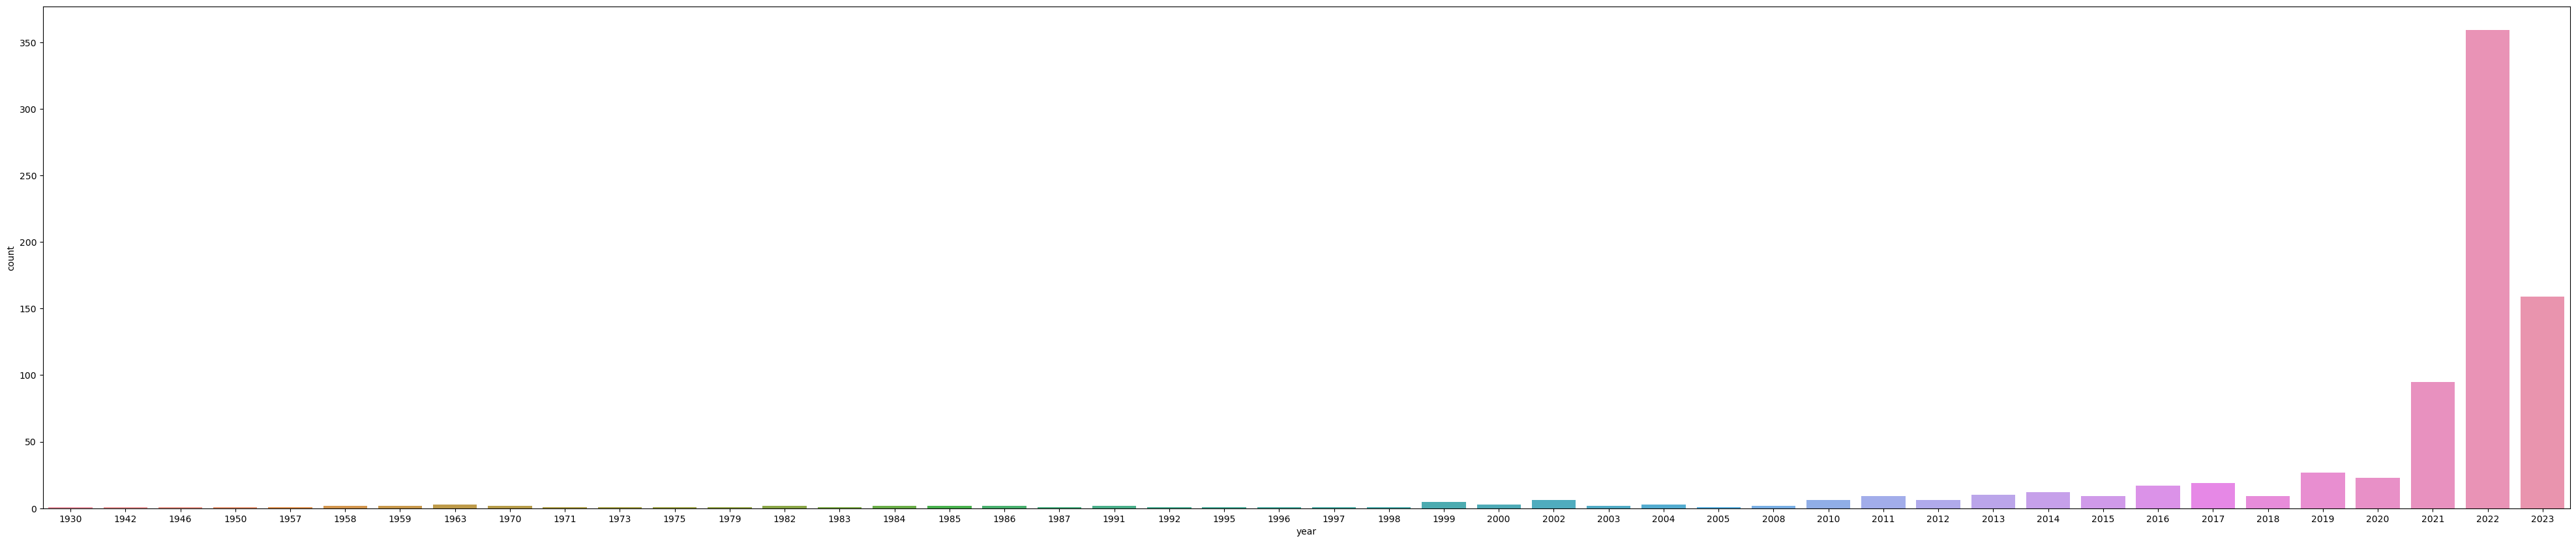

In [44]:
plt.figure(figsize=(50,10))

sns.countplot(x='year',data=spotify)

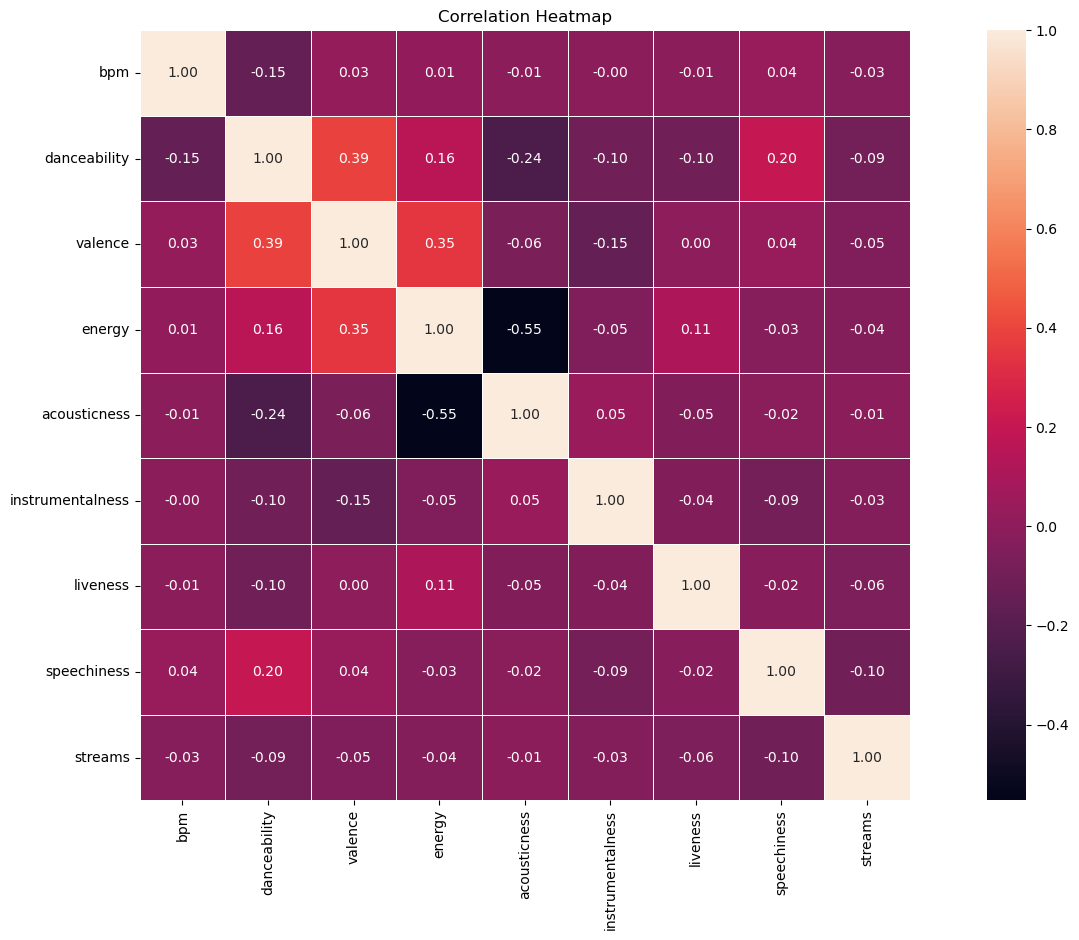

In [39]:
columns = ['bpm', 'danceability', 'valence', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'streams']

corr_matrix = spotify[columns].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", square=True, linewidth=0.5)

plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='key', ylabel='count'>

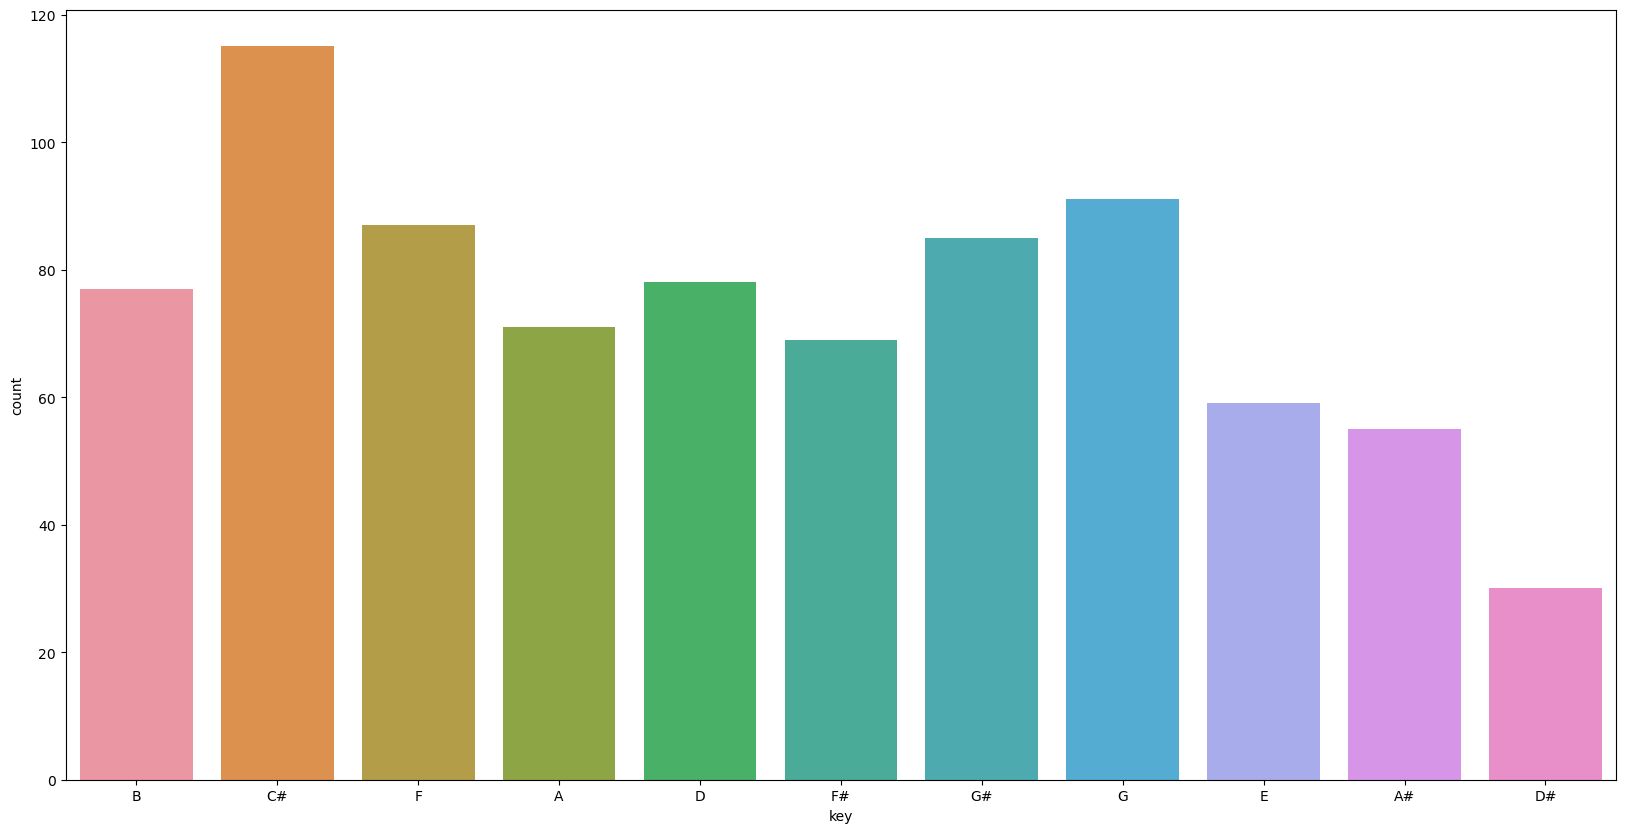

In [42]:
plt.figure(figsize=(20,10))

sns.countplot(x='key',data=spotify)